In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import f1_score

In [2]:
# Load the data
data = pd.read_csv('resources/flights.csv')
data.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,...,1197705,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,...,1393007,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,...,1541205,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,...,1226603,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,...,1226603,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0


In [3]:
# Drop unnecessary columns
data = data.drop(columns=['OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_SEQ_ID', 'DEST_AIRPORT_SEQ_ID','ARR_TIME'])

In [4]:
# check for missing values
data.isnull().sum()

DAY_OF_MONTH            0
DAY_OF_WEEK             0
OP_UNIQUE_CARRIER       0
ORIGIN_AIRPORT_ID       0
ORIGIN                  0
DEST_AIRPORT_ID         0
DEST                    0
DEP_TIME             6664
DEP_DEL15            6699
DEP_TIME_BLK            0
ARR_DEL15            8078
CANCELLED               0
DIVERTED                0
DISTANCE                0
dtype: int64

In [5]:
# Drop rows with missing values
data = data.dropna()


In [6]:
# Convert time columns to numeric values
data['DEP_TIME'] = pd.to_numeric(data['DEP_TIME'], errors='coerce', downcast='integer')
data.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,3,EV,13930,ORD,11977,GRB,1003,0.0,1000-1059,0.0,0.0,0.0,174.0
1,1,3,EV,15370,TUL,13930,ORD,1027,0.0,1000-1059,0.0,0.0,0.0,585.0
2,1,3,EV,11618,EWR,15412,TYS,1848,0.0,1800-1859,0.0,0.0,0.0,631.0
3,1,3,EV,10781,BTR,12266,IAH,1846,0.0,1800-1859,0.0,0.0,0.0,253.0
4,1,3,EV,14524,RIC,12266,IAH,1038,0.0,1000-1059,0.0,0.0,0.0,1157.0


In [7]:
data = pd.get_dummies(data, columns=['DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'DEP_TIME_BLK'])

In [8]:
# Define features and target
X = data.drop(columns=['ARR_DEL15'])
y = data['ARR_DEL15']

In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Create and train the RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# Predictions and evaluation
y_pred_rf = clf_rf.predict(X_test)
print("Random Forest Classifier")
print("Training Accuracy: ", clf_rf.score(X_train, y_train))
print("Testing Accuracy: ", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Classifier
Training Accuracy:  0.9999618581743892
Testing Accuracy:  0.9325290214205061

Confusion Matrix:
 [[150411   4614]
 [  7516  17240]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.97      0.96    155025
         1.0       0.79      0.70      0.74     24756

    accuracy                           0.93    179781
   macro avg       0.87      0.83      0.85    179781
weighted avg       0.93      0.93      0.93    179781



In [13]:
# Create and train the GradientBoostingClassifier
clf_gb = GradientBoostingClassifier(random_state=42)
clf_gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [14]:
# Predictions and evaluation
y_pred_gb = clf_gb.predict(X_test)
print("\nGradient Boosting Classifier")
print("Training Accuracy: ", clf_gb.score(X_train, y_train))
print("Testing Accuracy: ", accuracy_score(y_test, y_pred_gb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))


Gradient Boosting Classifier
Training Accuracy:  0.9323030272690215
Testing Accuracy:  0.9314888670104182

Confusion Matrix:
 [[149057   5968]
 [  6349  18407]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96    155025
         1.0       0.76      0.74      0.75     24756

    accuracy                           0.93    179781
   macro avg       0.86      0.85      0.85    179781
weighted avg       0.93      0.93      0.93    179781



In [15]:
# Create and train the LogisticRegression model
clf_lr = LogisticRegression(random_state=42, max_iter=1000)
clf_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [16]:
# Predictions and evaluation
y_pred_lr = clf_lr.predict(X_test)
print("Logistic Regression")
print("Training Accuracy: ", clf_lr.score(X_train, y_train))
print("Testing Accuracy: ", accuracy_score(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression
Training Accuracy:  0.9312255206955162
Testing Accuracy:  0.9300649123099771

Confusion Matrix:
 [[149133   5892]
 [  6681  18075]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96    155025
         1.0       0.75      0.73      0.74     24756

    accuracy                           0.93    179781
   macro avg       0.86      0.85      0.85    179781
weighted avg       0.93      0.93      0.93    179781



### Optimized Logistic Regression Model

In [17]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [18]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
optimized_clf = LogisticRegression(C=0.001, penalty='l1', solver='liblinear', random_state=42)
optimized_clf.fit(X_train, y_train)

LogisticRegression(C=0.001, penalty='l1', random_state=42, solver='liblinear')

In [20]:
# Predictions and evaluation
y_pred_opt = optimized_clf.predict(X_test)
print("Training Accuracy: ", optimized_clf.score(X_train, y_train))
print("Testing Accuracy: ", accuracy_score(y_test, y_pred_opt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_opt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_opt))


Training Accuracy:  0.9320980149563634
Testing Accuracy:  0.9313831828724949

Confusion Matrix:
 [[148987   6038]
 [  6298  18458]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96    155025
         1.0       0.75      0.75      0.75     24756

    accuracy                           0.93    179781
   macro avg       0.86      0.85      0.85    179781
weighted avg       0.93      0.93      0.93    179781



/Users/johnharris/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


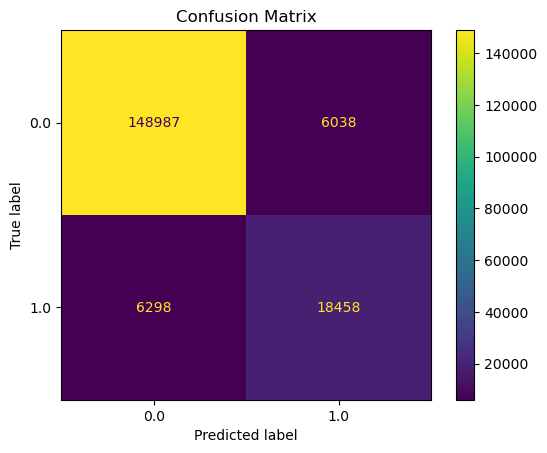

In [21]:
# Plot confusion matrix
from sklearn.metrics import plot_confusion_matrix, roc_curve, auc
fig, ax = plt.subplots()
plot_confusion_matrix(optimized_clf, X_test, y_test, ax=ax)
ax.set_title('Confusion Matrix')
plt.show()


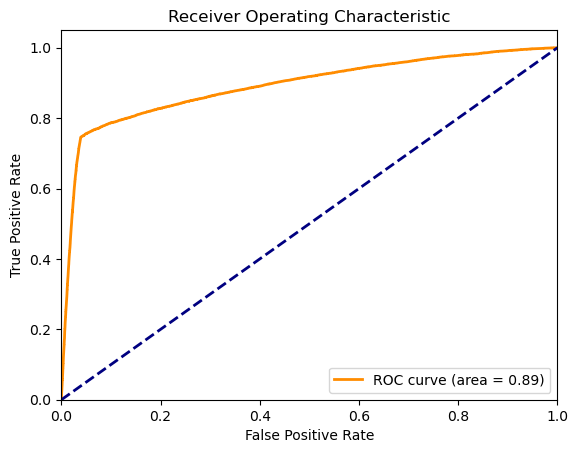

In [22]:
# Plot ROC curve
y_pred_proba = optimized_clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Optimized Random Forest Classifier

In [23]:
import numpy as np
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.ensemble import RandomForestClassifier

In [24]:
# Create the RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

In [25]:
# Define the hyperparameter search space
param_dist = {
    'n_estimators': np.arange(100, 1001, 100),
    'max_depth': [None] + list(np.arange(3, 21)),
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [26]:
halving_random_search = HalvingRandomSearchCV(
    estimator=clf,
    param_distributions=param_dist,
    factor=2,  # The number of candidates that are kept after each iteration
    resource='n_samples',  # Setting resource to n_samples
    max_resources=len(X_train),  # Maximum number of samples to allocate to candidates
    min_resources=int(len(X_train) / 16),  # Minimum number of samples to allocate to candidates (you can adjust this value)
    n_jobs=-1,  # Use all available cores
    random_state=42,
    verbose=1,
    cv=5  # Number of cross-validation folds
)


In [27]:
# Run the HalvingRandomSearchCV
halving_random_search.fit(X_train, y_train)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 26217
max_resources_: 419487
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 16
n_resources: 26217
Fitting 5 folds for each of 16 candidates, totalling 80 fits


KeyboardInterrupt: 

In [ ]:
best_params = halving_random_search.best_params_
print("Best hyperparameters found by HalvingRandomSearchCV:")
print(best_params)

Best hyperparameters found by HalvingRandomSearchCV:
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 19, 'bootstrap': True}


In [ ]:
optimized_rf_clf = RandomForestClassifier(**best_params, random_state=42)
optimized_rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=19, max_features='sqrt', n_estimators=300,
                       random_state=42)

In [ ]:
y_pred = optimized_rf_clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Training Accuracy: ", optimized_rf_clf.score(X_train, y_train))
print("Testing Accuracy: ", optimized_rf_clf.score(X_test, y_test))


Confusion Matrix:
[[154378    647]
 [ 17888   6868]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.94    155025
         1.0       0.91      0.28      0.43     24756

    accuracy                           0.90    179781
   macro avg       0.91      0.64      0.68    179781
weighted avg       0.90      0.90      0.87    179781

Training Accuracy:  0.9078231268191863
Testing Accuracy:  0.8969023422942357


Optimized GradientBoosting classifier

In [ ]:
# Define a range of hyperparameters
n_estimators_options = [100, 200, 300]
learning_rate_options = [0.01, 0.1, 0.2]
max_depth_options = [3, 4, 5]

In [ ]:
# Placeholder for best model and performance metrics
best_model = None
best_f1 = 0
best_params = None

In [ ]:
# Iterate through the hyperparameter combinations
for n_estimators in n_estimators_options:
    for learning_rate in learning_rate_options:
        for max_depth in max_depth_options:

            # Train the GradientBoostingClassifier with current hyperparameters
            model = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, random_state=42)
            model.fit(X_train, y_train)

            # Predict on test set and calculate F1 score
            y_pred = model.predict(X_test)
            f1 = f1_score(y_test, y_pred, pos_label=1.0)

            # Update the best model if the current model has better F1 score
            if f1 > best_f1:
                best_model = model
                best_f1 = f1
                best_params = {'n_estimators': n_estimators, 'learning_rate': learning_rate, 'max_depth': max_depth}

In [ ]:
# Print the best hyperparameters and the F1 score
print("Best Hyperparameters:", best_params)
print("Best F1 score:", best_f1)

Best Hyperparameters: {'n_estimators': 300, 'learning_rate': 0.1, 'max_depth': 5}
Best F1 score: 0.7524022860970964


In [ ]:
# Evaluate the best model
y_pred = best_model.predict(X_test)
print("Training Accuracy: ", best_model.score(X_train, y_train))
print("Testing Accuracy: ", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Training Accuracy:  0.9370373813729627
Testing Accuracy:  0.9342144053042313

Confusion Matrix:
 [[149984   5041]
 [  6786  17970]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.97      0.96    155025
         1.0       0.78      0.73      0.75     24756

    accuracy                           0.93    179781
   macro avg       0.87      0.85      0.86    179781
weighted avg       0.93      0.93      0.93    179781

